The plan with this notebook is to explore and take a look at the distributions of the original variables that I'll be working with in this project. I'll plan on looking at the majority of the variables both with and without outliers.

In [31]:
from dsfuncs.processing import remove_outliers
from dsfuncs.plotting import plot_var_dist
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def read_df(year): 
    """Read in a year's worth of data. 
    
    Args: 
        year: int
    """
    
    df = pd.read_csv('../../../data/csvs/detected_fires_' + str(year) + '.csv', true_values =['t', 'True'], false_values=['f', 'False'])
    return df

In [3]:
# Test out my function and see what columns I actually want to look at the distributions of. 
fires_df_2012 = read_df(2012)
fires_df_2012.columns

Index([u'ogc_fid', u'wkb_geometry', u'area', u'perimeter', u'fire_',
       u'fire_id', u'lat', u'long', u'date', u'julian', u'gmt', u'temp',
       u'spix', u'tpix', u'src', u'sat_src', u'conf', u'frp', u'fire_bool',
       u'urban_areas_bool', u'region_aland', u'region_awater', u'region_name',
       u'region_lsad', u'region_code', u'county_aland', u'county_awater',
       u'county_name', u'county_lsad', u'county_fips', u'state_aland',
       u'state_awater', u'state_name', u'state_lsad', u'state_fips'],
      dtype='object')

In [4]:
fires_df_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252439 entries, 0 to 252438
Data columns (total 35 columns):
ogc_fid             252439 non-null int64
wkb_geometry        252439 non-null object
area                252439 non-null float64
perimeter           252439 non-null float64
fire_               252439 non-null int64
fire_id             252439 non-null int64
lat                 252439 non-null float64
long                252439 non-null float64
date                252439 non-null object
julian              252439 non-null int64
gmt                 252439 non-null int64
temp                252439 non-null float64
spix                252439 non-null float64
tpix                252439 non-null float64
src                 252439 non-null object
sat_src             252439 non-null object
conf                252439 non-null int64
frp                 252439 non-null float64
fire_bool           252439 non-null bool
urban_areas_bool    252439 non-null bool
region_aland        247286 non-

In [5]:
# I'm going to look at the following set of continous and categorical variables. 
continous_vars = ['lat', 'long', 'gmt', 'temp', 'spix', 'tpix', 'conf', 'frp', 'county_aland', 'county_awater']
categorical_vars = ['urban_areas_bool', 'src', 'sat_src']

In [6]:
# Test out the outliers function to make sure it runs. 
print fires_df_2012['lat'].values.shape
print remove_outliers(fires_df_2012['lat']).shape

(252439,)
(248341,)


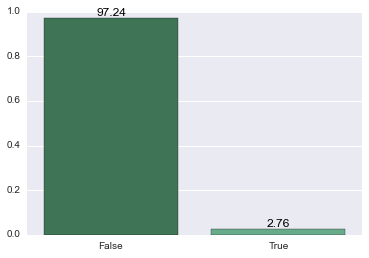

In [33]:
# Testing out the plot_var_dist function for a categorical variable. 
plot_var_dist(fires_df_2012['urban_areas_bool'], categorical=True)

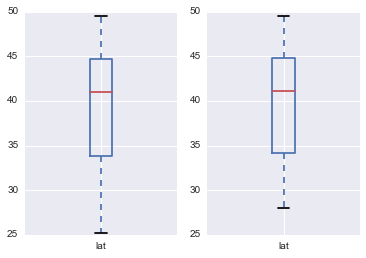

In [32]:
# Testing out the plot_var_dist function for a continuous variable. 
plot_var_dist(fires_df_2012['lat'])